#### Problem Statement:
MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged.

 

#### Attribute information:

1. age: age of the policyholder
2. sex: gender of the policyholder
3. bmi: Body Mass Index of the policyholder
4. children: number of children of the policyholder
5. smoker: whether the policyholder is a smoker or not
6. region: region where the policyholder belongs to
7. charges: premium charged to the policyholder
 

#### Kindly go through these guidelines before you attempt the quiz:

1. Use random_state=1 wherever this parameter can be used.
2. Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
3. Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
4. The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
5. No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
6. If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [65]:
# loading the dataset
df = pd.read_csv("insurance.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 1338 rows and 7 columns.


<IPython.core.display.Javascript object>

In [4]:
# to view first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<IPython.core.display.Javascript object>

In [31]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.0,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.0,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.0,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
sex_female,1338.0,0.494768,0.500160,0.000000,0.000000,0.000000,1.000000,1.000000
sex_male,1338.0,0.505232,0.500160,0.000000,0.000000,1.000000,1.000000,1.000000
smoker_no,1338.0,0.795217,0.403694,0.000000,1.000000,1.000000,1.000000,1.000000
smoker_yes,1338.0,0.204783,0.403694,0.000000,0.000000,0.000000,0.000000,1.000000
region_northeast,1338.0,0.242152,0.428546,0.000000,0.000000,0.000000,0.000000,1.000000
region_northwest,1338.0,0.242900,0.428995,0.000000,0.000000,0.000000,0.000000,1.000000


<IPython.core.display.Javascript object>

In [6]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

<IPython.core.display.Javascript object>

In [8]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["sex", "smoker", "region"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

male      676
female    662
Name: sex, dtype: int64
--------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
df.duplicated().sum()

1

<IPython.core.display.Javascript object>

In [12]:
print(df[df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


<IPython.core.display.Javascript object>

In [66]:
df_d = pd.get_dummies(df, columns=["sex"], drop_first=True)
df_d.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


<IPython.core.display.Javascript object>

In [67]:
df_d = pd.get_dummies(df_d, columns=["smoker", "region"], drop_first=True)
df_d.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<IPython.core.display.Javascript object>

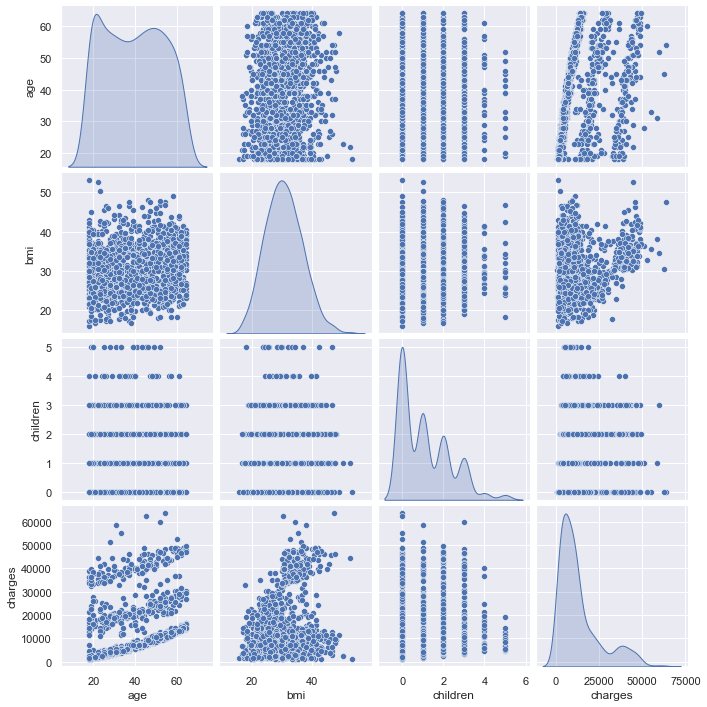

<IPython.core.display.Javascript object>

In [68]:
cData_attr = df_d.iloc[:, 0:4]
sns.pairplot(cData_attr, diag_kind="kde")

In [72]:
# lets build our linear model
# independant variables
X = df_d.drop(["charges"], axis=1)
# the dependent variable
y = df_d[["charges"]]

<IPython.core.display.Javascript object>

In [73]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [74]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [75]:
for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx])
    )

The coefficient for age is 251.68186514630264
The coefficient for bmi is 322.3891068370296
The coefficient for children is 344.9642552960665
The coefficient for sex_male is -282.79634660878975
The coefficient for smoker_yes is 24059.39047692338
The coefficient for region_northwest is -304.0900976542831
The coefficient for region_southeast is -939.3420969057253
The coefficient for region_southwest is -868.1885586576745


<IPython.core.display.Javascript object>

In [76]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.238418561557


<IPython.core.display.Javascript object>

In [77]:
regression_model.score(X_train, y_train)

0.7545557492633161

<IPython.core.display.Javascript object>

In [78]:
# out of sample score (R^2)

regression_model.score(X_test, y_test)

0.7405989316927213

<IPython.core.display.Javascript object>

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

# print(y_pred)

# In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8436747360087882


<IPython.core.display.Javascript object>

In [63]:
# Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8414518898662788


<IPython.core.display.Javascript object>

In [28]:
df["children"].value_counts(normalize=True) * 100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

<IPython.core.display.Javascript object>

In [29]:
df["bmi_log"] = np.log(df["bmi"])

<IPython.core.display.Javascript object>

(array([ 15.,  34.,  80., 176., 259., 304., 268., 147.,  46.,   9.]),
 array([2.77008559, 2.89035121, 3.01061682, 3.13088244, 3.25114805,
        3.37141367, 3.49167928, 3.6119449 , 3.73221051, 3.85247613,
        3.97274174]),
 <BarContainer object of 10 artists>)

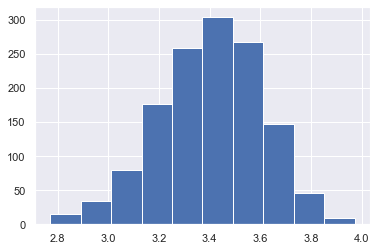

<IPython.core.display.Javascript object>

In [34]:
plt.hist(df["bmi_log"], bins=10)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

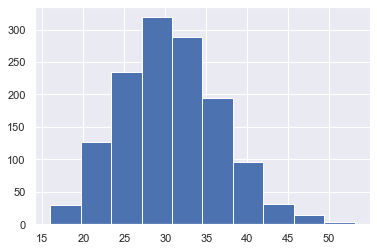

<IPython.core.display.Javascript object>

In [35]:
plt.hist(df["bmi"], bins=10)

<AxesSubplot:xlabel='charges', ylabel='Count'>

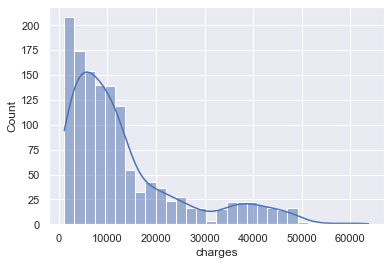

<IPython.core.display.Javascript object>

In [46]:
sns.histplot(data=df, x="charges", multiple="dodge", kde=True)

In [42]:
df.groupby("region")["charges"].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

In [44]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<IPython.core.display.Javascript object>

In [45]:
pd.get_dummies(df, columns=["region"], drop_first=True)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


<IPython.core.display.Javascript object>

In [47]:
def reject_outliers(data):
    u = np.mean(data.Price)
    s = np.std(data.Price)
    data_filtered = data[(data.Price > u - 2 * s) & (data.Price < u + 2 * s)]
    return data_filtered

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

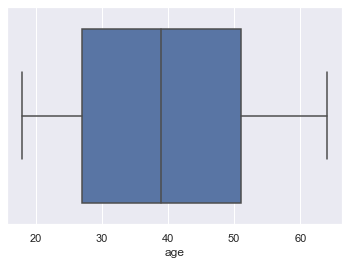

<IPython.core.display.Javascript object>

In [51]:
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='bmi'>

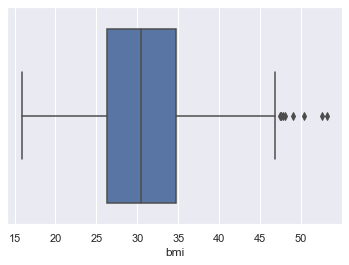

<IPython.core.display.Javascript object>

In [64]:
sns.boxplot(x=df["bmi"])

In [80]:
y_pred = regression_model.predict(X_test)

<IPython.core.display.Javascript object>

In [82]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_pred))

4139.932064766011


<IPython.core.display.Javascript object>

In [83]:
print(metrics.mean_squared_error(y_test, y_pred))

36761456.352013245


<IPython.core.display.Javascript object>

In [85]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6063.122656850449


<IPython.core.display.Javascript object>